# 4.4 - CNN Architectures

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

enabling encryption...
encryption enabled
replicating local resources


In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.4.1'

see 

- [ImageNet](http://www.image-net.org/)

- [ImageNet - Large Scale Visual Recognition Challenge (ILSVRC)](http://www.image-net.org/challenges/LSVRC/)

----


- [A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)

- [Benchmark Analysis of Representative Deep Neural Network Architectures](https://www.researchgate.net/publication/328509150_Benchmark_Analysis_of_Representative_Deep_Neural_Network_Architectures)


----

- [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)

- [Difference between AlexNet, VGGNet, ResNet, and Inception](https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96)

- [An Intuitive Guide to Deep Network Architectures](https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41)

In [78]:
vgg16 = tf.keras.applications.VGG16()

In [79]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Get some random image and transform it. We need the correct shape and pixel values

In [161]:
img_url = 'https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/rrswbphev006.jpg?itok=9I7wPblq'

In [162]:
from skimage.io import imread
from skimage.transform import resize

--2021-02-14 19:57:46--  https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/rrswbphev006.jpg?itok=9I7wPblq
Resolving www.autocar.co.uk (www.autocar.co.uk)... 13.226.49.122, 13.226.49.37, 13.226.49.22, ...
Connecting to www.autocar.co.uk (www.autocar.co.uk)|13.226.49.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116781 (114K) [image/jpeg]
Saving to: ‘rrswbphev006.jpg?itok=9I7wPblq’

rrswbphev006.jpg?it 100%[===================>] 114.04K  --.-KB/s    in 0.05s   

2021-02-14 19:57:46 (2.05 MB/s) - ‘rrswbphev006.jpg?itok=9I7wPblq’ saved [116781/116781]

(1, 224, 224, 3) 0 255


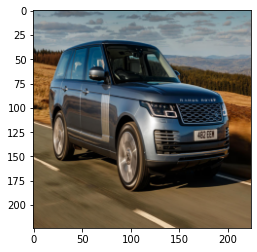

In [163]:
def get_img(img_url):
    img_fname = img_url.split("/")[-1]
    !wget -nc $img_url
    img = imread(img_fname)
    simg = resize(img, output_shape=(224,224,3))
    simg = ((simg-np.min(simg))/(np.max(simg)-np.min(simg))*255).astype(int)
    simg = simg.reshape([1,*simg.shape])
    return simg

simg = get_img(img_url)
print(simg.shape, np.min(simg), np.max(simg))
plt.imshow(simg[0])

make and decode prediction

In [164]:
output = vgg16.predict(simg)
output.shape

(1, 1000)

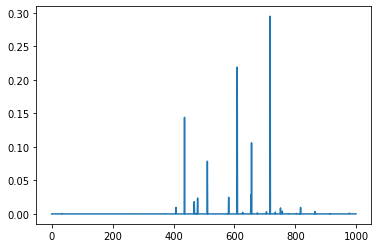

In [165]:
plt.plot(output[0])

In [166]:
np.argsort(output[0])[::-1][:5]

array([717, 609, 436, 656, 511])

In [167]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [168]:
decode_predictions(output)

[[('n03930630', 'pickup', 0.2946707),
  ('n03594945', 'jeep', 0.2187905),
  ('n02814533', 'beach_wagon', 0.14391266),
  ('n03770679', 'minivan', 0.105930716),
  ('n03100240', 'convertible', 0.078578584)]]

we can also use it as a feature extractor

In [169]:
inputs = vgg16.layers[0]
layer = vgg16.get_layer('fc1')

layer_output_fn = tf.keras.Model(inputs.input, layer.output)

In [170]:
layer_output_fn(simg)

<tf.Tensor: shape=(1, 4096), dtype=float32, numpy=
array([[0.     , 0.     , 0.     , ..., 1.44261, 0.     , 0.     ]],
      dtype=float32)>

and do other stuff (train other models, compare, etc.)

File ‘960x0.jpg?fit=scale’ already there; not retrieving.

File ‘12VIRUS-CARS-eli-mobileMasterAt3x-v2.jpg’ already there; not retrieving.

--2021-02-14 19:59:26--  https://media-cdn.tripadvisor.com/media/photo-s/12/99/82/95/bellaire-house.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58530 (57K) [image/jpeg]
Saving to: ‘bellaire-house.jpg’

bellaire-house.jpg  100%[===================>]  57.16K  --.-KB/s    in 0.01s   

2021-02-14 19:59:26 (4.44 MB/s) - ‘bellaire-house.jpg’ saved [58530/58530]



(-0.5, 223.5, 223.5, -0.5)

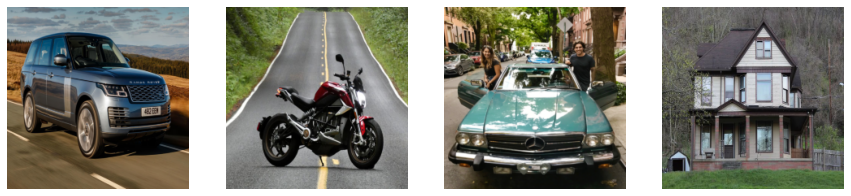

In [178]:
simg2 = get_img('https://specials-images.forbesimg.com/imageserve/5d61562368cb0a0008c04988/960x0.jpg?fit=scale')
simg3 = get_img('https://static01.nyt.com/images/2020/08/13/fashion/12VIRUS-CARS-eli/12VIRUS-CARS-eli-mobileMasterAt3x-v2.jpg')
simg4 = get_img('https://media-cdn.tripadvisor.com/media/photo-s/12/99/82/95/bellaire-house.jpg')
plt.figure(figsize=(15,6))
plt.subplot(141); plt.imshow(simg[0]); plt.axis("off")
plt.subplot(142); plt.imshow(simg2[0]); plt.axis("off")
plt.subplot(143); plt.imshow(simg3[0]); plt.axis("off")
plt.subplot(144); plt.imshow(simg4[0]); plt.axis("off")

In [179]:
feats = layer_output_fn(np.vstack((simg,simg2,simg3,simg4))).numpy()
feats.shape

(4, 4096)

In [180]:
import itertools
r = np.zeros((len(feats), len(feats)))
for i,j in itertools.product(range(len(feats)), range(len(feats))):
    r[i,j] = np.mean(np.abs(feats[i]-feats[j]))
r

array([[0.        , 2.57414365, 2.57649517, 2.30459738],
       [2.57414365, 0.        , 3.01039696, 2.43500757],
       [2.57649517, 3.01039696, 0.        , 2.78080606],
       [2.30459738, 2.43500757, 2.78080606, 0.        ]])

and, of course, the imagenet classification

In [181]:
preds = vgg16.predict(np.vstack((simg,simg2,simg3,simg4)))
decode_predictions(preds)

[[('n03930630', 'pickup', 0.29467037),
  ('n03594945', 'jeep', 0.21879068),
  ('n02814533', 'beach_wagon', 0.14391305),
  ('n03770679', 'minivan', 0.1059308),
  ('n03100240', 'convertible', 0.078578345)],
 [('n04482393', 'tricycle', 0.4868581),
  ('n03791053', 'motor_scooter', 0.122519016),
  ('n03785016', 'moped', 0.06780141),
  ('n03534580', 'hoopskirt', 0.0479511),
  ('n02769748', 'backpack', 0.04404157)],
 [('n02930766', 'cab', 0.64891493),
  ('n04252077', 'snowmobile', 0.048013847),
  ('n03459775', 'grille', 0.043748885),
  ('n03445924', 'golfcart', 0.0394534),
  ('n02704792', 'amphibian', 0.032926943)],
 [('n02859443', 'boathouse', 0.41583353),
  ('n02825657', 'bell_cote', 0.17513582),
  ('n03028079', 'church', 0.08576325),
  ('n03930313', 'picket_fence', 0.06905515),
  ('n02793495', 'barn', 0.042880956)]]



## Tensorflow Hub

[https://www.tensorflow.org/hub](https://www.tensorflow.org/hub)